In [9]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from urllib.request import urlopen   # in Python3
import numpy as np
%matplotlib inline

url = "http://wiki.nurserylive.com/uploads/default/original/2X/b/bd24518a6fb6b8dbe9e55bb793a94df7adbe9bc1.png"

<class 'numpy.ndarray'>
(315, 600, 3)


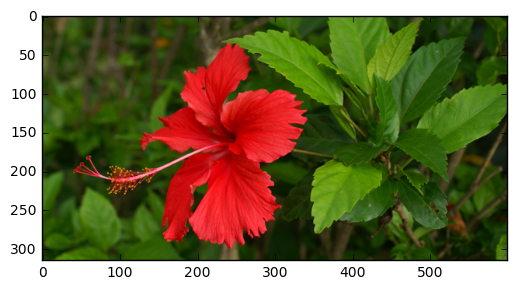

In [8]:
try:
    data = urlopen(url) #in Python3
except Exception:
    from io import BytesIO
    data = BytesIO(urlopen(url).read())  # in Python3
    
# First, load the image
image = mpimg.imread(data)
print(type(image))

# Print out its shape
print(image.shape)
plt.imshow(image)
plt.show()

In [16]:
print(image[0])

[[ 0.15686275  0.27058825  0.01176471]
 [ 0.16470589  0.26666668  0.02745098]
 [ 0.17254902  0.26274511  0.02745098]
 ..., 
 [ 0.07450981  0.20784314  0.01176471]
 [ 0.07450981  0.21176471  0.01568628]
 [ 0.14509805  0.26274511  0.07843138]]


In [11]:
import tensorflow as tf
print (tf.__version__)

1.0.1


(315, 600, 3)
<class 'numpy.ndarray'>
(600, 315, 3)


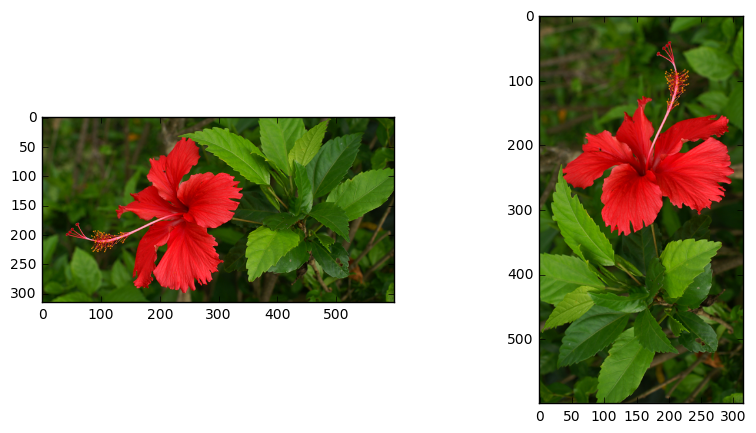

In [12]:
# Create a TensorFlow Variable
x = tf.Variable(image, name='x')
# 내용을 바꾸고 싶으면 variable, 상수로 선언할때는 constant
x = tf.transpose(x, perm=[1, 0, 2])
# 1, 0, 2 -> 차원
# 0, 1 차원이 width, height 이므로 둘만 바꿔주고, 2차원은 rgb 이므로 바꿔줄 빌요가없다.

with tf.Session() as session:
    model = tf.global_variables_initializer()
    session.run(model)
    result = session.run(x)

print(image.shape)    
print(type(result))
print(result.shape)

plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.imshow(image)

plt.subplot(1,2,2)
plt.imshow(result)

plt.show()
#show 명령을 주지 않으면 메모리까지만 그려두고 표현해주지 않음

In [18]:
height, width, depth = image.shape
print ([width]*height)

#[변수] : list, [600]
# [600]*315 = [600, 600, 600, ..., 600] : 숫자 600이 315개가 존재하도록 함

[600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600,

(315, 600, 3)
(315, 600, 3)


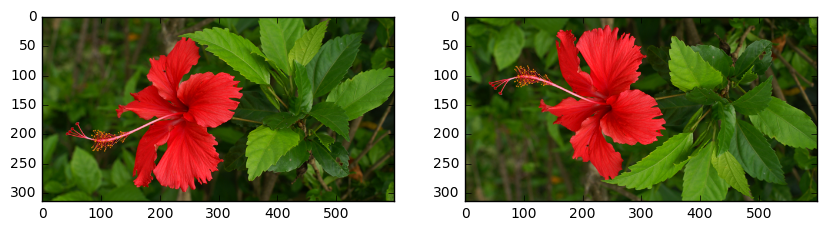

In [22]:
height, width, depth = image.shape

# Create a TensorFlow Variable
x = tf.Variable(image, name='x')
x = tf.reverse_sequence(x, [height] * width, seq_dim=0, batch_dim=1)
#x = tf.reverse_sequence(x, np.ones((height,)) * width, seq_dim=1, batch_dim=0)
# 새로운 텐서는 원본 이미지를 좌우 flip 하도록 함
# 각 줄에 있는 600개의 데이터들을 reverse 시켜라

with tf.Session() as session:
    model = tf.global_variables_initializer()
    session.run(model)
    result = session.run(x)

print (image.shape)
print (result.shape)

plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.imshow(image)

plt.subplot(1,2,2)
plt.imshow(result)

plt.show()

In [15]:
print ([width] * height)
print (np.ones(height))
print (np.ones((height,)))
print (np.ones((height,)) * width)

[600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600,

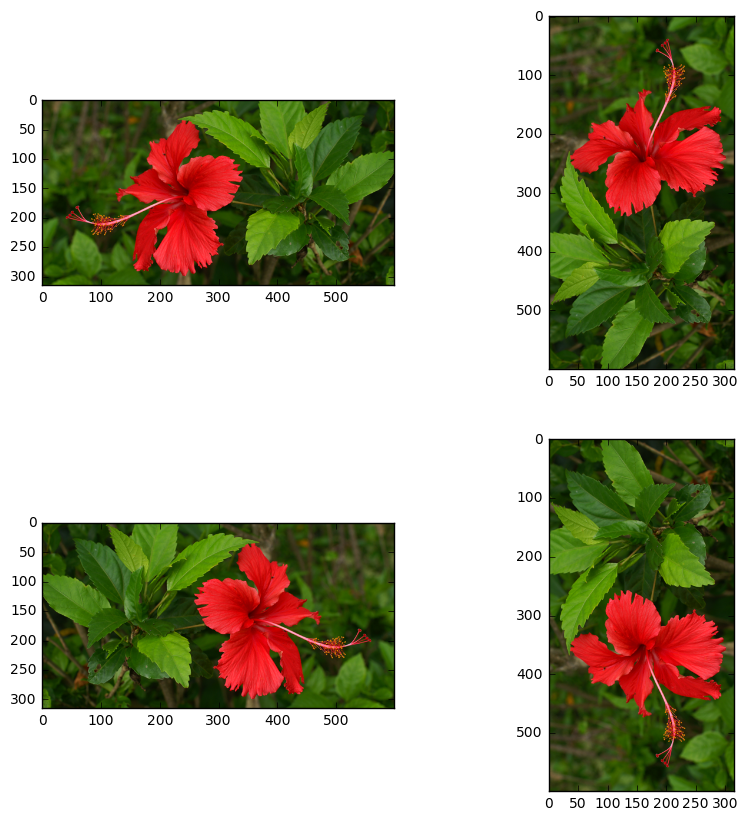

In [23]:
# Create a TensorFlow Variable
x = tf.Variable(image, name='x')
x1 = tf.transpose(x, perm=[1, 0, 2])
x2 = tf.reverse_sequence(x, [width] * height, seq_dim=1, batch_dim=0)
x3 = tf.transpose(x2, perm=[1, 0, 2])

with tf.Session() as session:
    model = tf.global_variables_initializer()
    session.run(model)
    result90 = session.run(x1)
    result180 = session.run(x2)
    result270 = session.run(x3)    

plt.figure(figsize=(10, 10))
plt.subplot(2,2,1)
plt.imshow(image)

plt.subplot(2,2,2)
plt.imshow(result90)

plt.subplot(2,2,3)
plt.imshow(result180)

plt.subplot(2,2,4)
plt.imshow(result270)

plt.show()  

(315, 600, 3)
(315, 600, 3)


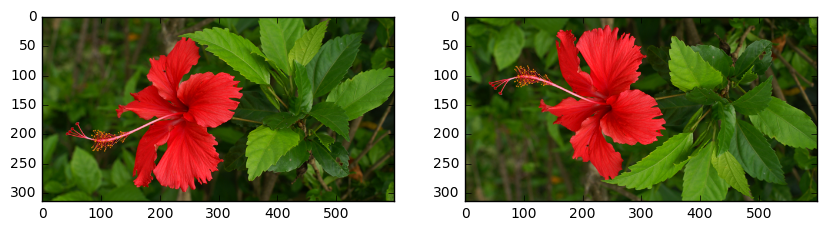

In [25]:
height, width, depth = image.shape

# Create a TensorFlow Variable
x = tf.Variable(image, name='x')
x = tf.reverse_sequence(x, [height] * width, seq_dim=0, batch_dim=1)

with tf.Session() as session:
    model = tf.global_variables_initializer()
    session.run(model)
    result = session.run(x)

print (image.shape)
print (result.shape)

plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.imshow(image)

plt.subplot(1,2,2)
plt.imshow(result)

plt.show()

In [27]:
height, width, depth = image.shape

# Create a TensorFlow Variable
x = tf.Variable(image, name='x')
x1_half = tf.slice(x, [0, 0, 0], [height, width / 2, 3]) 

x = tf.Variable(image, name='x')
x2 = tf.reverse_sequence(x, [width / 2] * height, seq_dim=1, batch_dim=0)
x2_half = tf.slice(x2, [0, 0, 0], [height, width / 2, 3])

x3 = tf.concat(concat_dim=1, values=[x1_half, x2_half])

with tf.Session() as session:
    model = tf.global_variables_initializer()
    session.run(model)
    result = session.run(x3)

plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.imshow(image)

plt.subplot(1,2,2)
plt.imshow(result)

plt.show()

TypeError: Expected int32 passed to parameter 'size' of op 'Slice', got [315, 300.0, 3] of type 'list' instead.